#**Assignment 5** 

In [46]:
import numpy as np
import matplotlib.pyplot as plt

#**Question 1**

##Square Wave

In [ ]:
t=np.linspace(0,6,100)
square_wave=psquare(t)
plt.figure(figsize=(15,5))
plt.plot(t,square_wave)
plt.xlabel('t(sec)')
plt.title(f'Rectangular function with period = 2 sec')
plt.grid()
plt.show()

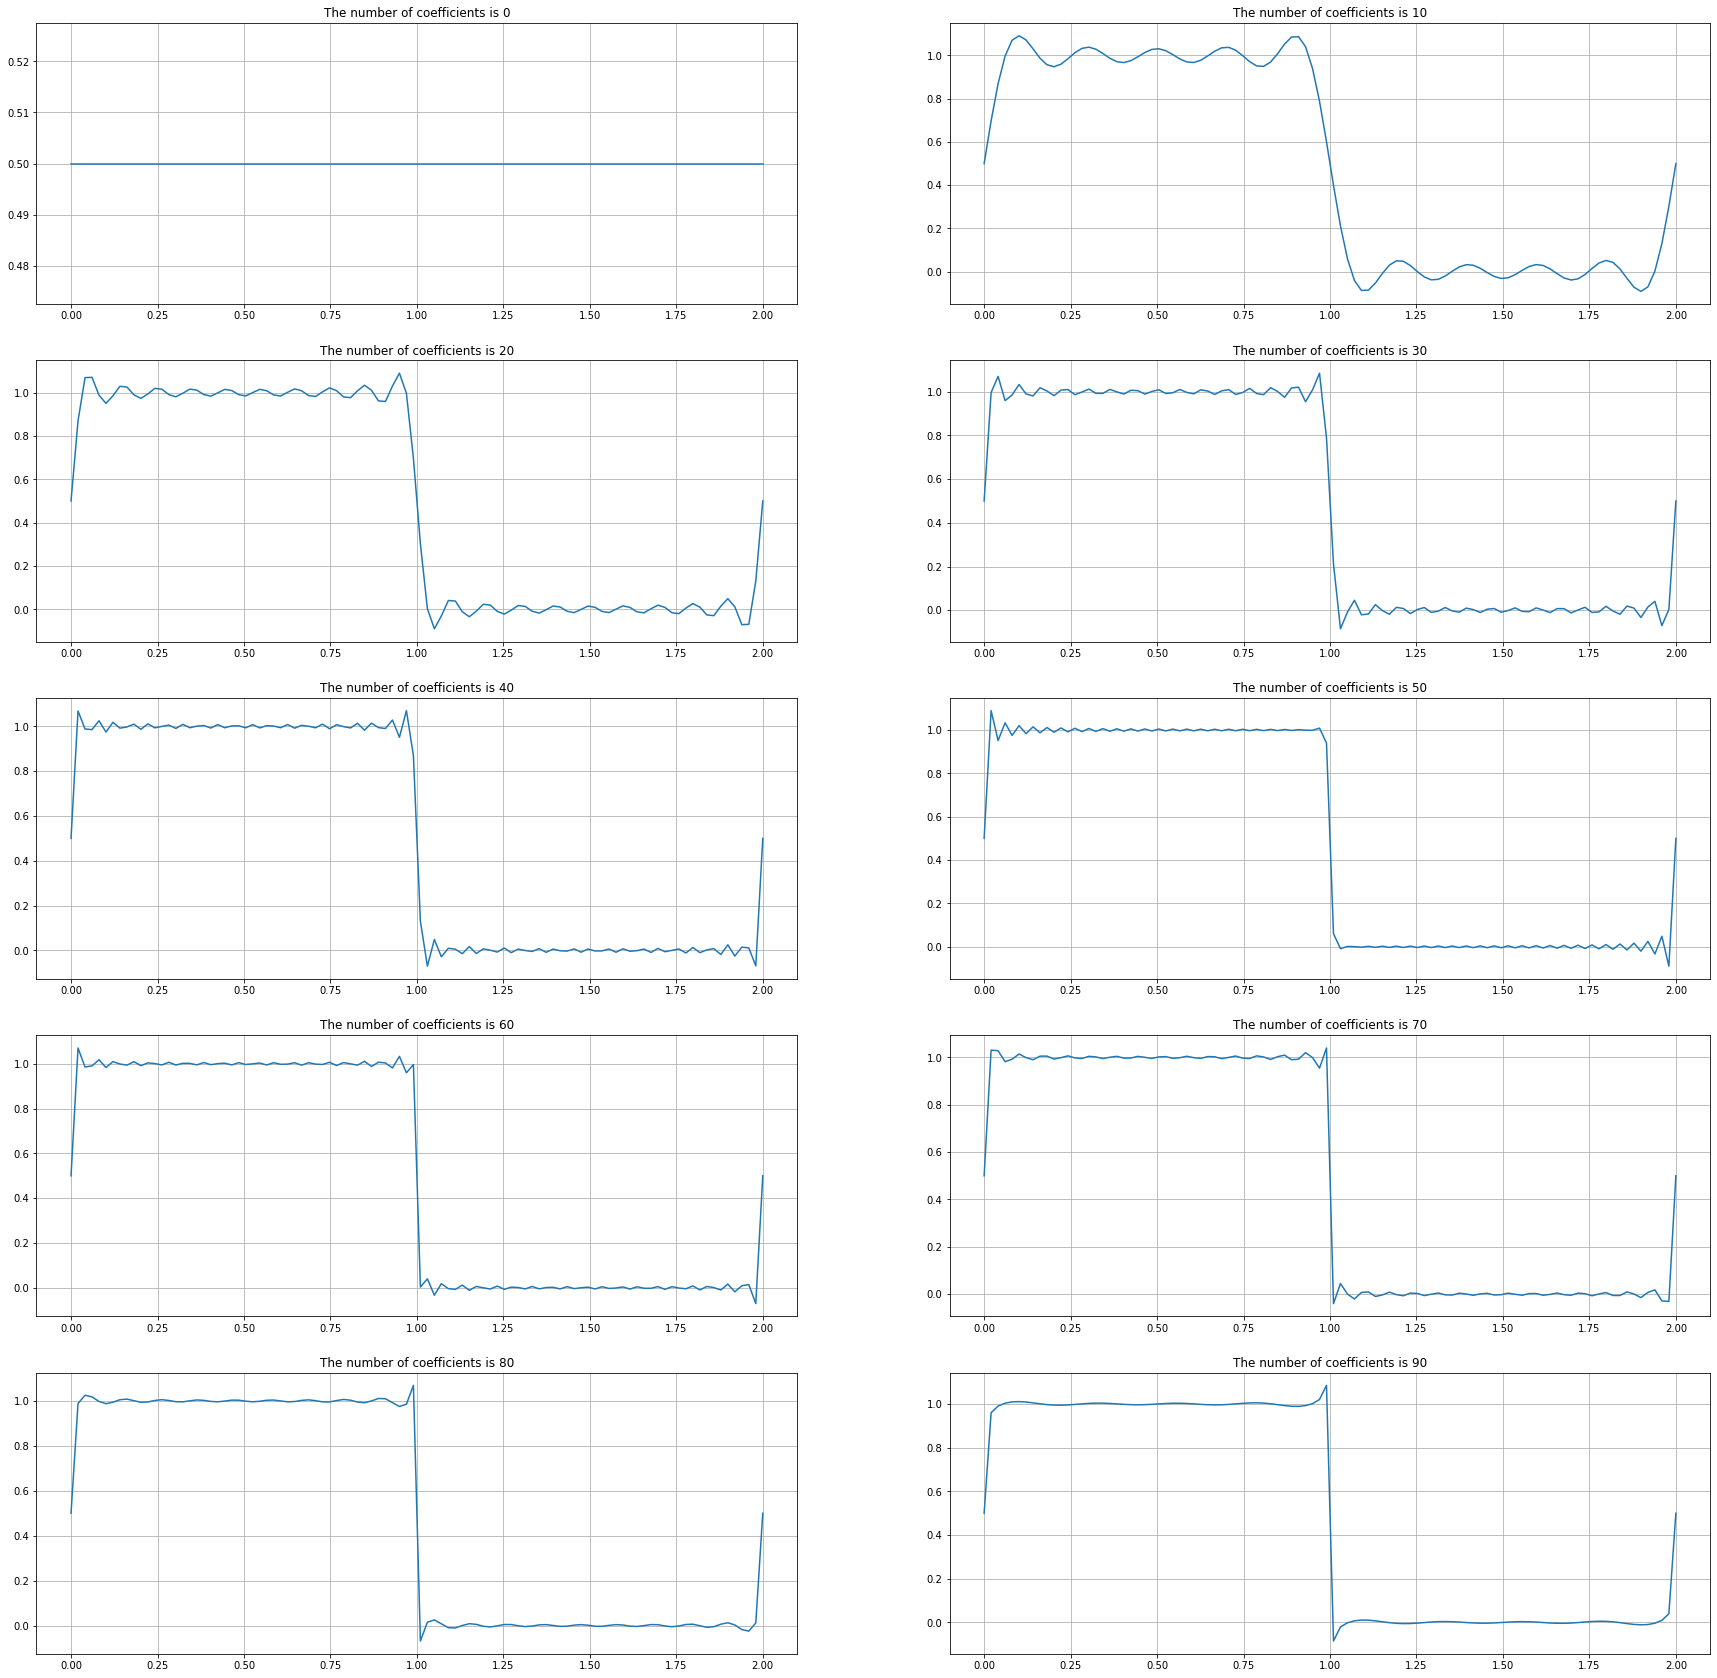

In [62]:
t=np.linspace(0,2,100)
plt.figure(1,figsize=(30,30))
def g(t):
  for i in range(10):
    s=np.zeros_like(t)
    for k in range(1,i*10):
      s+=(1/np.pi)*(1/k)*(np.sin(np.pi*k))*np.cos(np.pi*k*t)+(1/np.pi)*(1/k)*(1-np.cos(np.pi*k))*np.sin(np.pi*k*t)
    plt.subplot(5,2,i+1)
    plt.plot(t,s+0.5)
    plt.grid(True)
    plt.title(f"The number of coefficients is {i*10}")
g(t)

#**Question 2**

#DFT Function

In [1]:
def dft(x):
  N=len(x)
  y=np.zeros(N,dtype=complex)
  for k in range(N):
    for n in range(N):
      y[k]+=x[n]*np.exp(-1j*(2*np.pi*k*n)/N)
  return y

#$x(t) = cos{2\pi ft}$

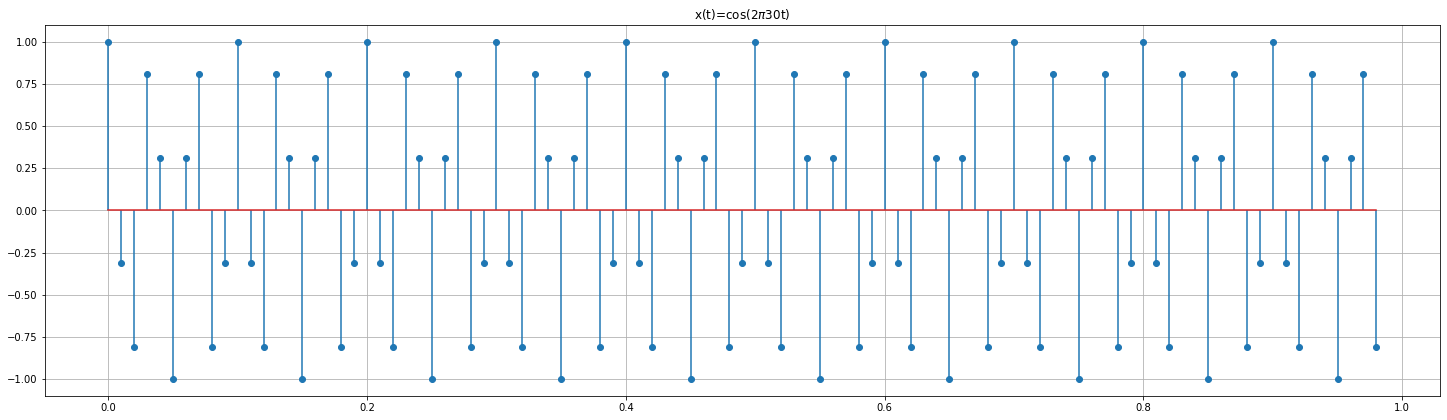

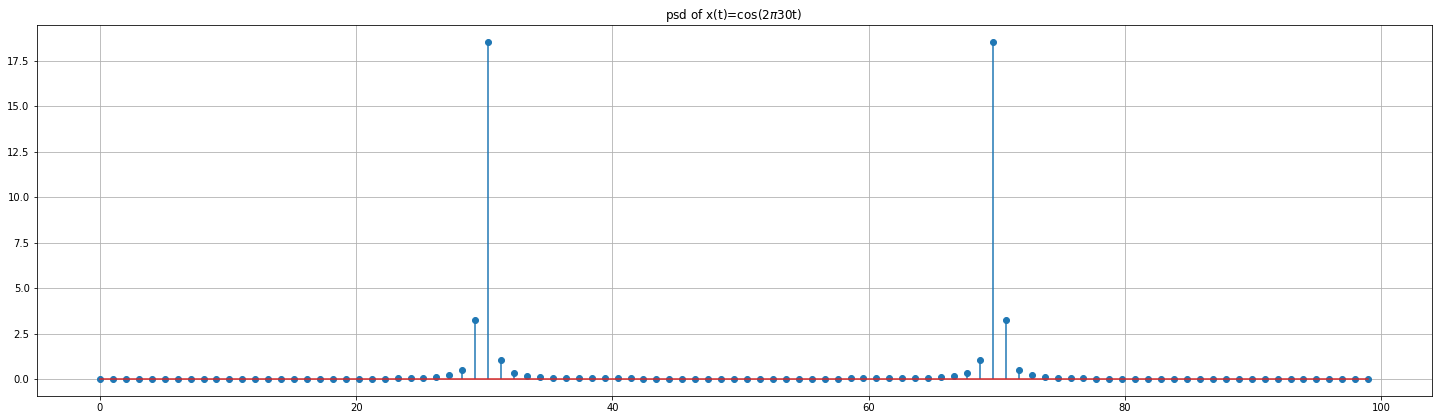

In [70]:
f=30  #frequency
tk=0.99  #time interval
fs=0.01  #sampling frequency
t=np.arange(0,tk,0.01)
x=np.cos(2*np.pi*f*t)

X=dft(x)
N=len(x)
fs=0.01
plt.figure(1,figsize=(25,15))
plt.subplot(2,1,1)
plt.stem(t,x,use_line_collection=True)
plt.title("x(t)=cos(2$\pi$30t)")
plt.grid(True)
plt.show()

k=np.arange(0,N,1,dtype=int)
wk=(2*np.pi*k)/N
psd=np.zeros_like(wk)
for i in range(len(k)):
  psd[i]=abs(X[i])**2
psd=np.array(psd/N)
plt.figure(1,figsize=(25,15))
plt.subplot(2,1,2)
f=(wk*100)/(2*np.pi)
plt.stem(f,psd,use_line_collection=True)
plt.title("psd of x(t)=cos(2$\pi$30t)")
plt.grid(True)
plt.show()

#Hanning window function

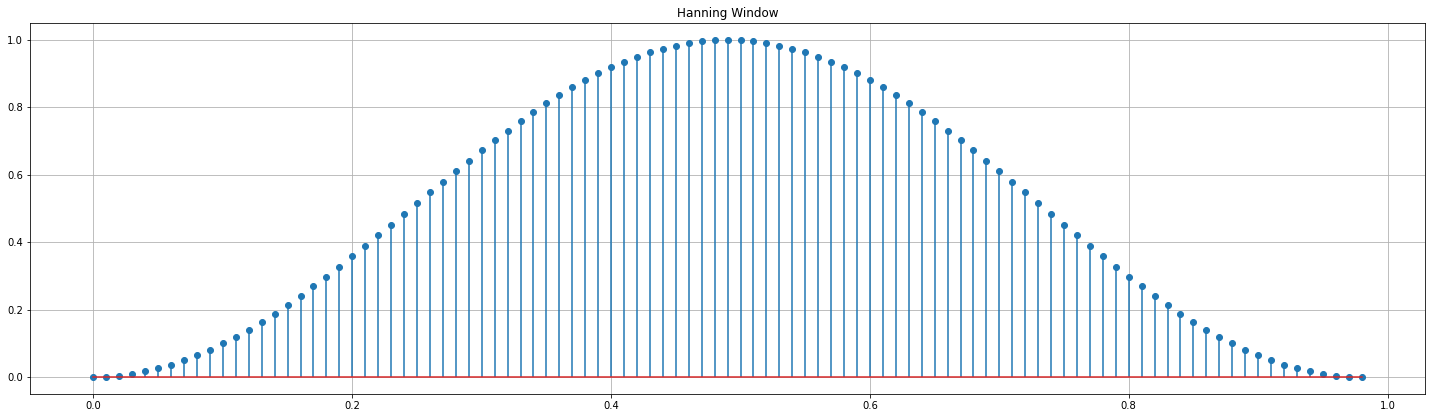

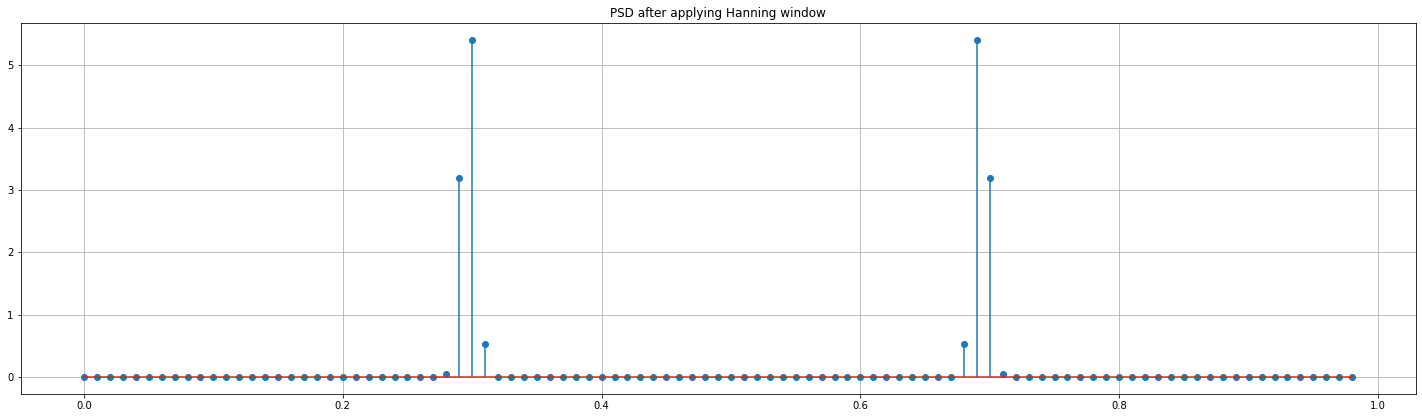

In [73]:
def hanning(M):
  return [0.5 -0.5*np.cos((2*np.pi*i)/(M-1)) for i in range(N)]

x1=x*hanning(len(t))
X=dft(x1) 
N=len(x1)

plt.figure(1,figsize=(25,15))
plt.subplot(2,1,1)
plt.stem(t,hanning(len(t)),use_line_collection=True)
plt.title("Hanning Window")
plt.grid(True)
plt.show()

k=np.arange(0,N,1,dtype=int)
wk=(2*np.pi*k)/N
psd=np.zeros_like(wk)
for i in k:
  psd[i]=abs(X[i])**2
plt.figure(1,figsize=(25,15))
plt.subplot(2,1,2)
plt.stem(t,psd/N,use_line_collection=True)
plt.title("PSD after applying Hanning window")
plt.grid(True)
plt.show()

#Hamming window function

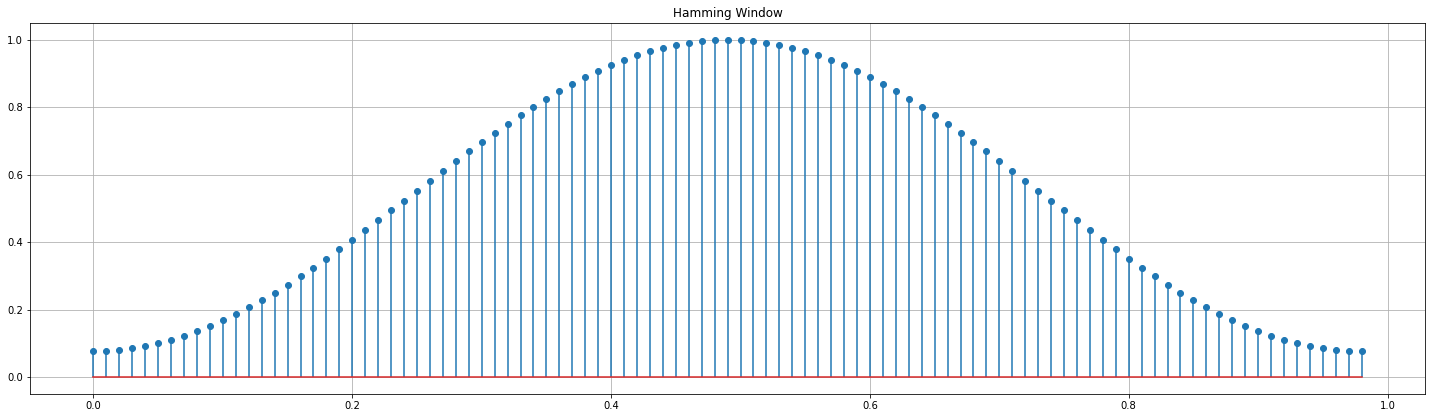

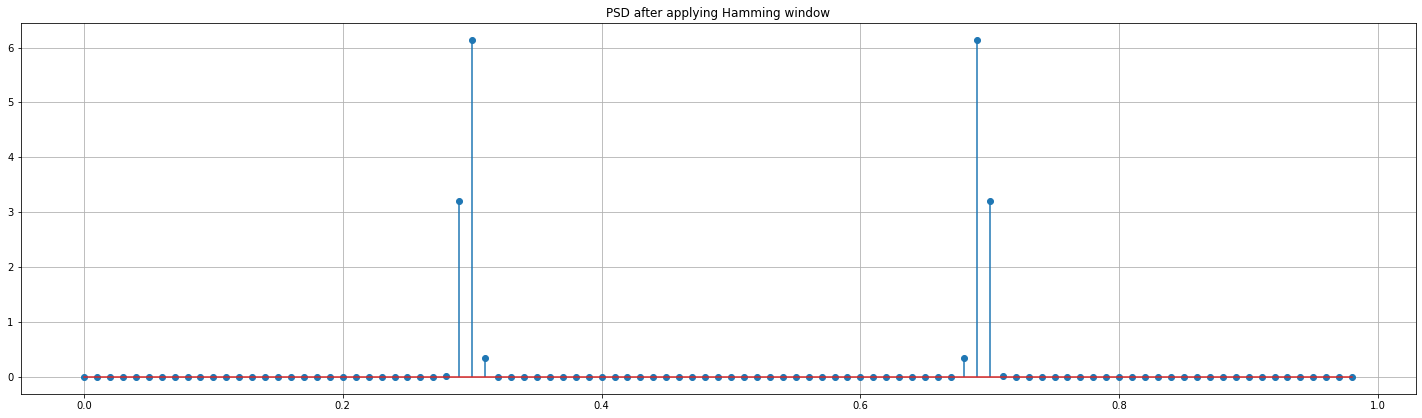

In [74]:
def hamming(M):
  return [0.53836 -0.46164*np.cos((2*np.pi*i)/(M-1)) for i in range(M)]
x1=x*hamming(len(t))
X=dft(x1)  #calculate dft of the signal
N=len(x1)

plt.figure(1,figsize=(25,15))
plt.subplot(2,1,1)
plt.stem(t,hamming(len(t)),use_line_collection=True)
plt.title("Hamming Window")
plt.grid(True)
plt.show()

k=np.arange(0,N,1,dtype=int)
wk=(2*np.pi*k)/N
psd=np.zeros_like(wk)
for i in k:
  psd[i]=abs(X[i])**2
plt.figure(1,figsize=(25,15))
plt.subplot(2,1,2)
plt.stem(t,psd/N,use_line_collection=True)
plt.title("PSD after applying Hamming window")
plt.grid(True)
plt.show()

#Bartlett Window Function

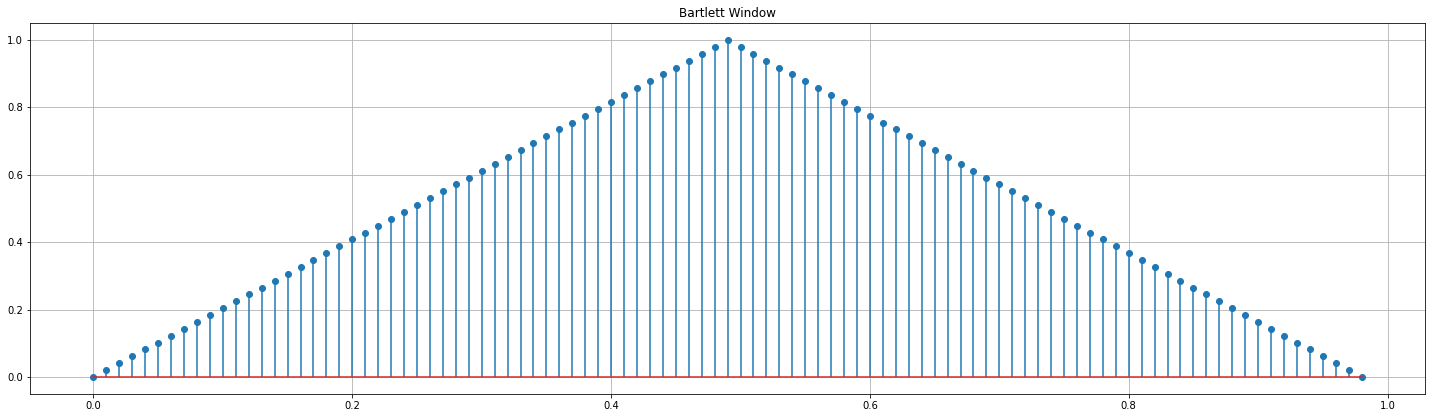

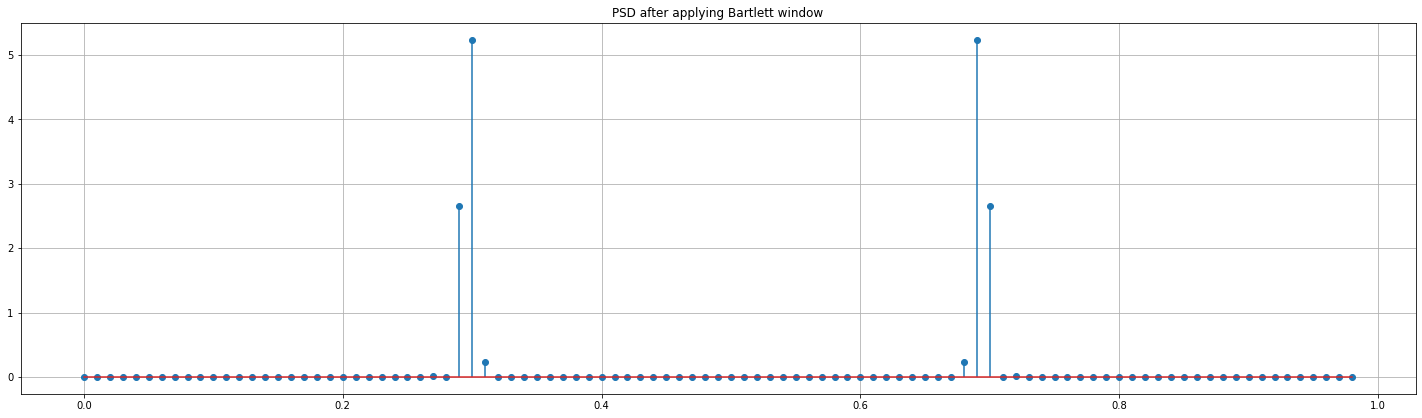

In [75]:
def bartlett(M):
  m=(M-1)/2
  return [(1/m)*(m-abs(i-m)) for i in range(M)]
x1=x*bartlett(len(t))
X=dft(x1)  #calculate dft of the signal
N=len(x1)

plt.figure(1,figsize=(25,15))
plt.subplot(2,1,1)
plt.stem(t,bartlett(len(t)),use_line_collection=True)
plt.title("Bartlett Window")
plt.grid(True)
plt.show()

k=np.arange(0,N,1,dtype=int)
wk=(2*np.pi*k)/N
psd=np.zeros_like(wk)
for i in k:
  psd[i]=abs(X[i])**2
plt.figure(1,figsize=(25,15))
plt.subplot(2,1,2)
plt.stem(t,psd/N,use_line_collection=True)
plt.title("PSD after applying Bartlett window")
plt.grid(True)
plt.show()

#**Question 3**

#$x(t) = cos{2\pi f_1t}+cos{2\pi f_2t}$
$f_1=10,f_2=30$

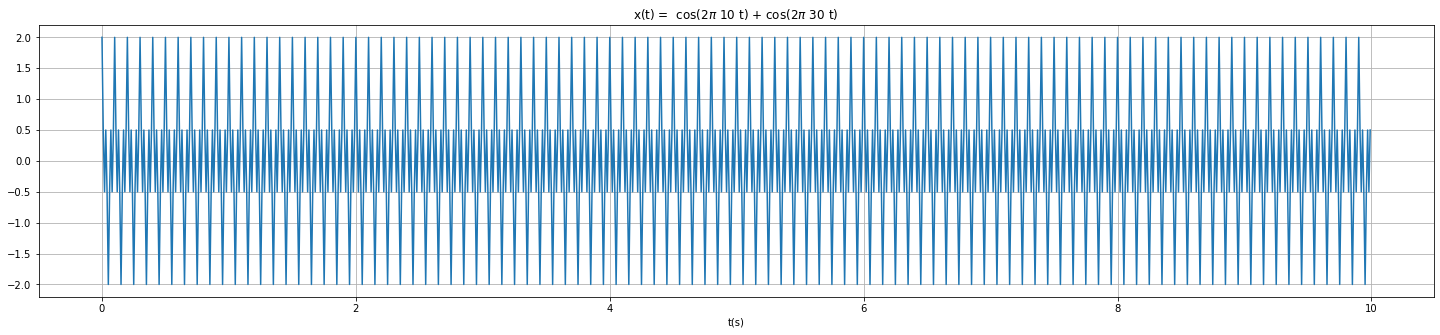

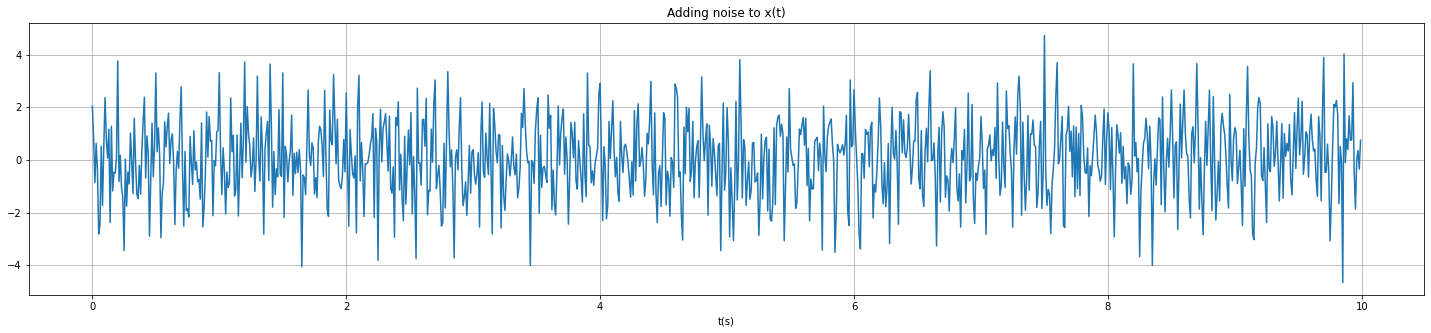

In [82]:
f1=10
f2=30
t=np.arange(0,10,0.01)
x=np.cos(2*np.pi*f1*t)+np.cos(2*np.pi*f2*t)

# White noise
mean = 0
std = 1
white_noise = np.random.normal(mean, std, size=1000)
y=x+white_noise

plt.figure(figsize=(25,5))
plt.plot(t,x)
plt.xlabel('t(s)')
plt.title('x(t) =  cos(2$\pi$ 10 t) + cos(2$\pi$ 30 t) ')
plt.grid()
plt.show()
plt.figure(figsize=(25,5))
plt.plot(t,y)
plt.xlabel('t(s)')
plt.title('Adding noise to x(t)')
plt.grid()
plt.show()

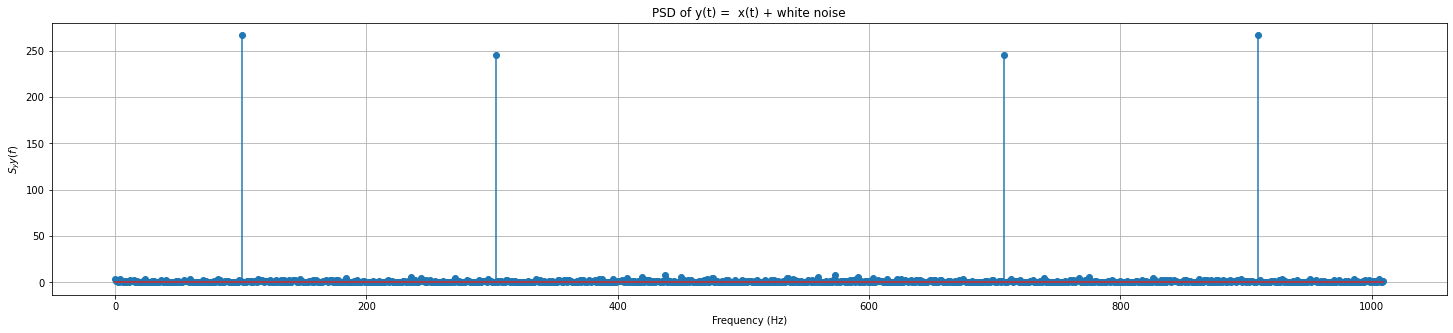

In [104]:
Y=dft(y)

p=np.arange(0,1000,1)
w=(2*np.pi*p)/N
psd=np.zeros(1000)
for i in p:
  psd[i]=abs(Y[i])**2
plt.figure(figsize=(25,5))
f=w*100/(2*np.pi)
psd=psd/1000
plt.stem(f,psd,use_line_collection=True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('$S_yy(f)$')
plt.title('PSD of y(t) =  x(t) + white noise')
plt.grid()
plt.show()

#Thresholding

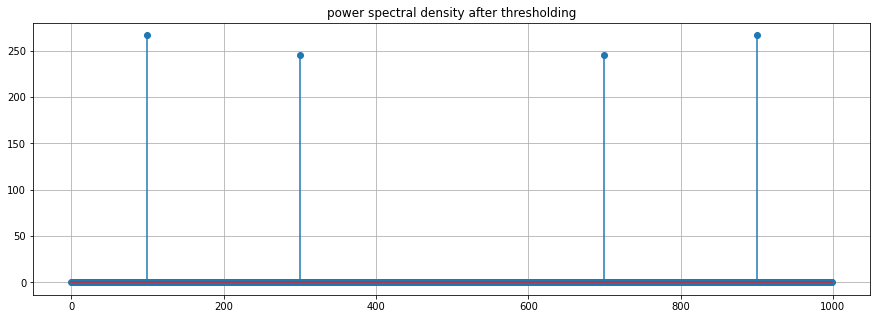

In [105]:
f= []
threshold = 50 #suitable threshold
for i in range(len(psd)):
    if psd[i] >threshold:
      f.append(psd[i])
    else:
      f.append(0)
      Y[i]=0
fig = plt.figure(1,figsize=(15,5))
plt.stem(f,use_line_collection=True)
plt.title("power spectral density after thresholding")
plt.grid(True)
plt.show()

#Reconstruction after thresholding

Text(0.5, 1.0, 'Reconstructed waveform of x(t)')

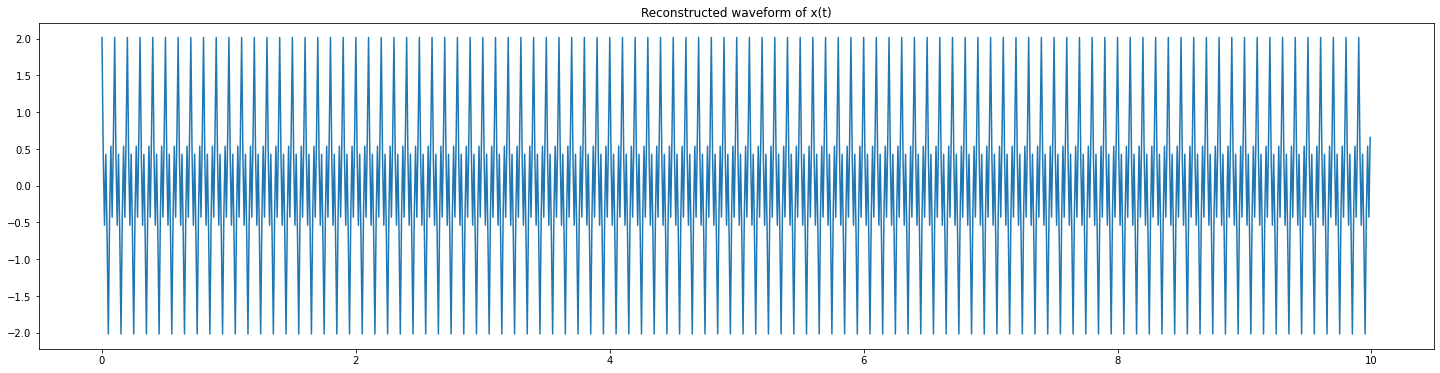

In [110]:
f1 = []
N = len(f)
t = np.arange(0,10,0.01)

def idft(x,N):
  y=np.zeros(N,dtype=complex)
  for k in range(N):
    for n in range(len(x)):
      y[k]+=(1/N)*x[n]*np.exp(1j*(2*np.pi*k*n)/N)
  return y

y_=idft(Y,1000)
fig = plt.figure(1,figsize=(25,6))
plt.plot(t,y_.real)
plt.title("Reconstructed waveform of x(t)")